# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60.0K/60.0K [06:39<00:00, 150File/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

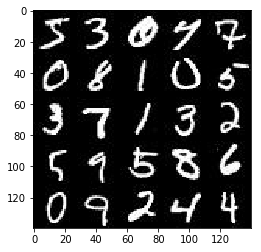

In [3]:
data_dir = './data'
import helper
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

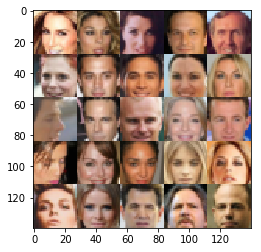

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32, (), name = 'learning_rate')
    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def lrelu(x, alpha):
    return tf.maximum(x * alpha, x)

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
       # Input is 28x28x3
        x = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x = lrelu(x, alpha)
        # 14x14x64
        
        x = tf.layers.conv2d(x, 128, 5, strides=2, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=True)
        # 7x7x128
        
        x = tf.layers.conv2d(x, 256, 5, strides=2, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=True)
        # 4x4x256
        
        x = tf.reshape(x, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = lrelu(x1, alpha)
        x1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = lrelu(x2, alpha)
        x2 = tf.layers.batch_normalization(x2, training=is_train)

        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = lrelu(x3, alpha)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        # 32x32x3 now

        out = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_real_out, d_real_logits = discriminator(input_real)
    d_fake_out, d_fake_logits = discriminator(g_model, reuse=True)
    
    smooth = 0.1
    real_labels = tf.ones_like(d_real_out) * (1 - smooth)
    fake_labels = tf.zeros_like(d_fake_out)
    g_labels    = tf.ones_like(d_fake_out)

    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=real_labels))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=fake_labels))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=g_labels))

    d_loss = d_real_loss + d_fake_loss
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count): 
            for batch_images  in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4809... Generator Loss: 2.5994
Epoch 1/2... Discriminator Loss: 0.3631... Generator Loss: 4.4607
Epoch 1/2... Discriminator Loss: 0.3778... Generator Loss: 3.8268
Epoch 1/2... Discriminator Loss: 0.4454... Generator Loss: 8.4467
Epoch 1/2... Discriminator Loss: 0.3785... Generator Loss: 4.0973
Epoch 1/2... Discriminator Loss: 0.3745... Generator Loss: 4.0654
Epoch 1/2... Discriminator Loss: 0.3335... Generator Loss: 6.2288
Epoch 1/2... Discriminator Loss: 0.5277... Generator Loss: 7.7210
Epoch 1/2... Discriminator Loss: 0.3989... Generator Loss: 7.7756
Epoch 1/2... Discriminator Loss: 0.3739... Generator Loss: 5.9927


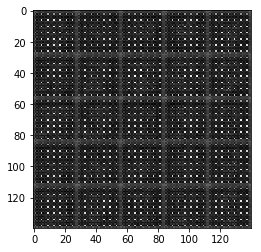

Epoch 1/2... Discriminator Loss: 0.3366... Generator Loss: 5.9736
Epoch 1/2... Discriminator Loss: 0.3946... Generator Loss: 6.8807
Epoch 1/2... Discriminator Loss: 0.3856... Generator Loss: 6.0087
Epoch 1/2... Discriminator Loss: 0.3343... Generator Loss: 6.4743
Epoch 1/2... Discriminator Loss: 0.3335... Generator Loss: 6.3095
Epoch 1/2... Discriminator Loss: 0.3733... Generator Loss: 6.3294
Epoch 1/2... Discriminator Loss: 0.3421... Generator Loss: 6.3975
Epoch 1/2... Discriminator Loss: 0.3295... Generator Loss: 7.2795
Epoch 1/2... Discriminator Loss: 0.3308... Generator Loss: 6.9731
Epoch 1/2... Discriminator Loss: 0.3526... Generator Loss: 6.7364


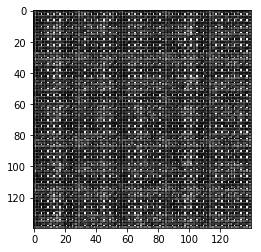

Epoch 1/2... Discriminator Loss: 0.3323... Generator Loss: 7.2002
Epoch 1/2... Discriminator Loss: 0.3288... Generator Loss: 7.1673
Epoch 1/2... Discriminator Loss: 0.3484... Generator Loss: 6.6377
Epoch 1/2... Discriminator Loss: 0.3545... Generator Loss: 6.5449
Epoch 1/2... Discriminator Loss: 0.3325... Generator Loss: 7.3388
Epoch 1/2... Discriminator Loss: 0.3357... Generator Loss: 7.1290
Epoch 1/2... Discriminator Loss: 0.3284... Generator Loss: 7.3015
Epoch 1/2... Discriminator Loss: 0.3281... Generator Loss: 7.5223
Epoch 1/2... Discriminator Loss: 0.3283... Generator Loss: 7.4058
Epoch 1/2... Discriminator Loss: 0.3280... Generator Loss: 7.2948


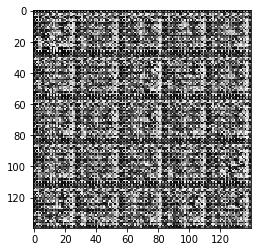

Epoch 1/2... Discriminator Loss: 0.5505... Generator Loss: 1.7404
Epoch 1/2... Discriminator Loss: 0.3451... Generator Loss: 5.7995
Epoch 1/2... Discriminator Loss: 0.3333... Generator Loss: 7.6208
Epoch 1/2... Discriminator Loss: 0.3306... Generator Loss: 7.6446
Epoch 1/2... Discriminator Loss: 0.3318... Generator Loss: 7.4442
Epoch 1/2... Discriminator Loss: 0.3304... Generator Loss: 6.6719
Epoch 1/2... Discriminator Loss: 0.3292... Generator Loss: 7.2531
Epoch 1/2... Discriminator Loss: 0.5700... Generator Loss: 17.0287
Epoch 1/2... Discriminator Loss: 0.3397... Generator Loss: 5.4627
Epoch 1/2... Discriminator Loss: 0.3479... Generator Loss: 7.6147


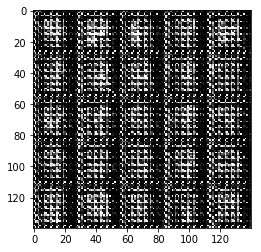

Epoch 1/2... Discriminator Loss: 0.4238... Generator Loss: 7.4830
Epoch 1/2... Discriminator Loss: 0.3448... Generator Loss: 5.6879
Epoch 1/2... Discriminator Loss: 8.1185... Generator Loss: 19.5952
Epoch 1/2... Discriminator Loss: 0.7545... Generator Loss: 3.2980
Epoch 1/2... Discriminator Loss: 0.4381... Generator Loss: 9.3142
Epoch 1/2... Discriminator Loss: 0.3607... Generator Loss: 4.4185
Epoch 1/2... Discriminator Loss: 0.7638... Generator Loss: 7.0438
Epoch 1/2... Discriminator Loss: 1.1678... Generator Loss: 1.5802
Epoch 1/2... Discriminator Loss: 0.8754... Generator Loss: 1.0484
Epoch 1/2... Discriminator Loss: 0.6301... Generator Loss: 2.2079


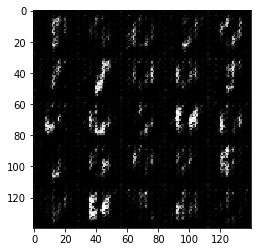

Epoch 1/2... Discriminator Loss: 0.8491... Generator Loss: 1.6857
Epoch 1/2... Discriminator Loss: 0.8573... Generator Loss: 1.7495
Epoch 1/2... Discriminator Loss: 1.4983... Generator Loss: 2.9926
Epoch 1/2... Discriminator Loss: 0.8371... Generator Loss: 1.5349
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 2.0969
Epoch 1/2... Discriminator Loss: 0.8476... Generator Loss: 1.5620
Epoch 1/2... Discriminator Loss: 0.9743... Generator Loss: 1.0304
Epoch 1/2... Discriminator Loss: 0.8879... Generator Loss: 1.2295
Epoch 1/2... Discriminator Loss: 0.7829... Generator Loss: 2.0221
Epoch 1/2... Discriminator Loss: 0.9055... Generator Loss: 2.6441


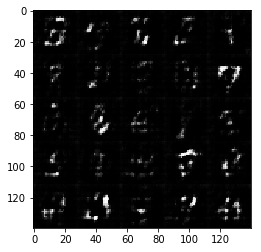

Epoch 1/2... Discriminator Loss: 0.7642... Generator Loss: 1.8439
Epoch 1/2... Discriminator Loss: 0.9098... Generator Loss: 2.5958
Epoch 1/2... Discriminator Loss: 0.8055... Generator Loss: 1.9080
Epoch 1/2... Discriminator Loss: 0.7429... Generator Loss: 2.2181
Epoch 1/2... Discriminator Loss: 0.8075... Generator Loss: 1.2445
Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 1.0926
Epoch 1/2... Discriminator Loss: 0.8611... Generator Loss: 1.0946
Epoch 1/2... Discriminator Loss: 0.8785... Generator Loss: 1.1181
Epoch 1/2... Discriminator Loss: 0.7730... Generator Loss: 1.5606
Epoch 1/2... Discriminator Loss: 0.8111... Generator Loss: 1.7950


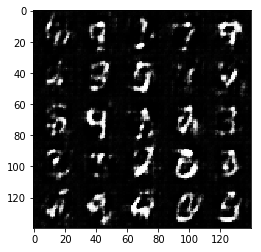

Epoch 1/2... Discriminator Loss: 1.9058... Generator Loss: 0.3661
Epoch 1/2... Discriminator Loss: 0.8167... Generator Loss: 1.4566
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 0.7771
Epoch 1/2... Discriminator Loss: 0.7304... Generator Loss: 1.4854
Epoch 1/2... Discriminator Loss: 0.7277... Generator Loss: 1.4989
Epoch 1/2... Discriminator Loss: 0.8279... Generator Loss: 1.3512
Epoch 1/2... Discriminator Loss: 0.8516... Generator Loss: 1.9375
Epoch 1/2... Discriminator Loss: 0.9702... Generator Loss: 1.2670
Epoch 1/2... Discriminator Loss: 0.9781... Generator Loss: 0.9541
Epoch 1/2... Discriminator Loss: 1.3396... Generator Loss: 0.5606


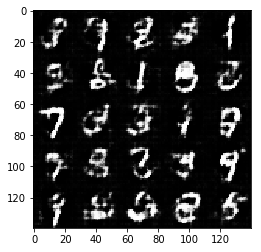

Epoch 1/2... Discriminator Loss: 0.8401... Generator Loss: 1.1868
Epoch 1/2... Discriminator Loss: 0.8290... Generator Loss: 1.7933
Epoch 1/2... Discriminator Loss: 1.0498... Generator Loss: 1.0148
Epoch 1/2... Discriminator Loss: 0.6754... Generator Loss: 1.8255
Epoch 1/2... Discriminator Loss: 0.9729... Generator Loss: 0.9584
Epoch 1/2... Discriminator Loss: 1.4971... Generator Loss: 0.6472
Epoch 1/2... Discriminator Loss: 1.1267... Generator Loss: 1.9711
Epoch 1/2... Discriminator Loss: 0.8792... Generator Loss: 1.1358
Epoch 1/2... Discriminator Loss: 0.8868... Generator Loss: 2.1638
Epoch 1/2... Discriminator Loss: 1.0330... Generator Loss: 1.0194


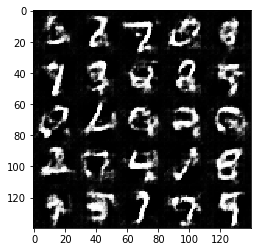

Epoch 1/2... Discriminator Loss: 1.0001... Generator Loss: 0.8202
Epoch 1/2... Discriminator Loss: 0.8567... Generator Loss: 1.5388
Epoch 1/2... Discriminator Loss: 1.0097... Generator Loss: 0.8919
Epoch 2/2... Discriminator Loss: 1.7676... Generator Loss: 0.3886
Epoch 2/2... Discriminator Loss: 0.9873... Generator Loss: 0.9094
Epoch 2/2... Discriminator Loss: 1.1495... Generator Loss: 0.7347
Epoch 2/2... Discriminator Loss: 0.9379... Generator Loss: 1.1977
Epoch 2/2... Discriminator Loss: 1.0774... Generator Loss: 1.6471
Epoch 2/2... Discriminator Loss: 1.0004... Generator Loss: 1.1442
Epoch 2/2... Discriminator Loss: 1.0852... Generator Loss: 0.7684


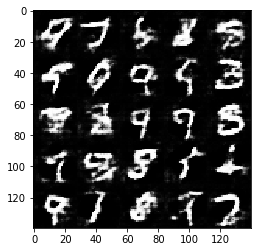

Epoch 2/2... Discriminator Loss: 1.0596... Generator Loss: 0.9647
Epoch 2/2... Discriminator Loss: 0.8180... Generator Loss: 1.5727
Epoch 2/2... Discriminator Loss: 0.8731... Generator Loss: 1.5734
Epoch 2/2... Discriminator Loss: 0.9847... Generator Loss: 1.0969
Epoch 2/2... Discriminator Loss: 0.7774... Generator Loss: 1.7412
Epoch 2/2... Discriminator Loss: 1.1602... Generator Loss: 0.7243
Epoch 2/2... Discriminator Loss: 0.9516... Generator Loss: 1.0751
Epoch 2/2... Discriminator Loss: 0.9129... Generator Loss: 1.8107
Epoch 2/2... Discriminator Loss: 1.1552... Generator Loss: 2.4417
Epoch 2/2... Discriminator Loss: 0.8620... Generator Loss: 1.3167


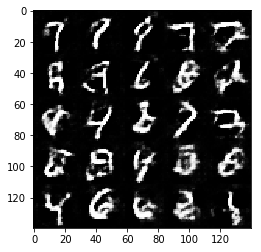

Epoch 2/2... Discriminator Loss: 0.8844... Generator Loss: 1.2275
Epoch 2/2... Discriminator Loss: 0.8311... Generator Loss: 1.2360
Epoch 2/2... Discriminator Loss: 0.8384... Generator Loss: 1.3483
Epoch 2/2... Discriminator Loss: 0.8245... Generator Loss: 1.4066
Epoch 2/2... Discriminator Loss: 0.9202... Generator Loss: 1.2104
Epoch 2/2... Discriminator Loss: 0.8861... Generator Loss: 1.1585
Epoch 2/2... Discriminator Loss: 0.9583... Generator Loss: 1.0100
Epoch 2/2... Discriminator Loss: 1.0802... Generator Loss: 0.8666
Epoch 2/2... Discriminator Loss: 1.0295... Generator Loss: 0.8758
Epoch 2/2... Discriminator Loss: 0.9390... Generator Loss: 2.1934


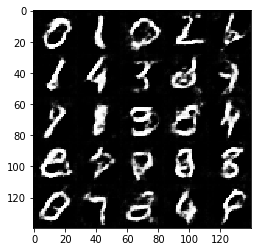

Epoch 2/2... Discriminator Loss: 0.7186... Generator Loss: 1.5937
Epoch 2/2... Discriminator Loss: 0.9925... Generator Loss: 2.3973
Epoch 2/2... Discriminator Loss: 0.9411... Generator Loss: 1.0224
Epoch 2/2... Discriminator Loss: 0.9292... Generator Loss: 1.0746
Epoch 2/2... Discriminator Loss: 0.8520... Generator Loss: 1.4302
Epoch 2/2... Discriminator Loss: 0.7952... Generator Loss: 1.9337
Epoch 2/2... Discriminator Loss: 0.9973... Generator Loss: 0.9501
Epoch 2/2... Discriminator Loss: 1.1596... Generator Loss: 0.7120
Epoch 2/2... Discriminator Loss: 1.0390... Generator Loss: 2.3253
Epoch 2/2... Discriminator Loss: 0.8062... Generator Loss: 1.7012


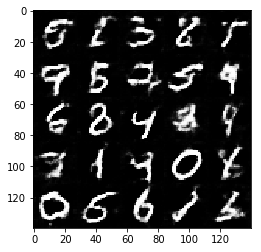

Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 1.1229
Epoch 2/2... Discriminator Loss: 0.8759... Generator Loss: 1.2594
Epoch 2/2... Discriminator Loss: 0.6872... Generator Loss: 1.8058
Epoch 2/2... Discriminator Loss: 0.8289... Generator Loss: 1.3991
Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 0.7434
Epoch 2/2... Discriminator Loss: 0.9390... Generator Loss: 1.0099
Epoch 2/2... Discriminator Loss: 1.2490... Generator Loss: 0.6192
Epoch 2/2... Discriminator Loss: 0.7505... Generator Loss: 1.4327
Epoch 2/2... Discriminator Loss: 0.7097... Generator Loss: 1.6219
Epoch 2/2... Discriminator Loss: 1.1598... Generator Loss: 0.7366


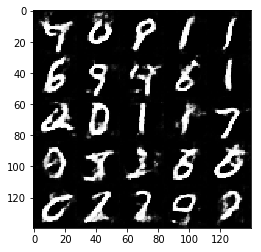

Epoch 2/2... Discriminator Loss: 0.9640... Generator Loss: 0.9821
Epoch 2/2... Discriminator Loss: 0.9242... Generator Loss: 1.4340
Epoch 2/2... Discriminator Loss: 0.9772... Generator Loss: 1.0640
Epoch 2/2... Discriminator Loss: 0.6579... Generator Loss: 1.6087
Epoch 2/2... Discriminator Loss: 1.4438... Generator Loss: 0.6541
Epoch 2/2... Discriminator Loss: 0.9847... Generator Loss: 0.9326
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.5417
Epoch 2/2... Discriminator Loss: 0.8661... Generator Loss: 1.1175
Epoch 2/2... Discriminator Loss: 0.7993... Generator Loss: 1.3574
Epoch 2/2... Discriminator Loss: 0.9867... Generator Loss: 2.6155


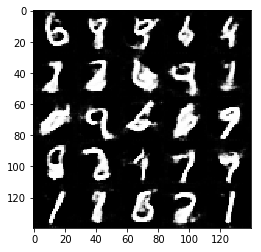

Epoch 2/2... Discriminator Loss: 1.1726... Generator Loss: 0.7227
Epoch 2/2... Discriminator Loss: 0.8370... Generator Loss: 1.1565
Epoch 2/2... Discriminator Loss: 0.7441... Generator Loss: 1.3507
Epoch 2/2... Discriminator Loss: 0.7450... Generator Loss: 1.4020
Epoch 2/2... Discriminator Loss: 0.8724... Generator Loss: 1.1330
Epoch 2/2... Discriminator Loss: 0.7810... Generator Loss: 1.7558
Epoch 2/2... Discriminator Loss: 1.1439... Generator Loss: 0.8004
Epoch 2/2... Discriminator Loss: 0.9015... Generator Loss: 1.1481
Epoch 2/2... Discriminator Loss: 1.5581... Generator Loss: 0.4029
Epoch 2/2... Discriminator Loss: 0.9556... Generator Loss: 0.9114


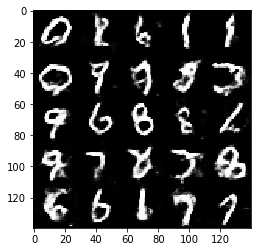

Epoch 2/2... Discriminator Loss: 1.3325... Generator Loss: 0.5574
Epoch 2/2... Discriminator Loss: 0.8321... Generator Loss: 1.2210
Epoch 2/2... Discriminator Loss: 0.8612... Generator Loss: 1.1055
Epoch 2/2... Discriminator Loss: 1.1511... Generator Loss: 0.7867
Epoch 2/2... Discriminator Loss: 0.7696... Generator Loss: 1.3752
Epoch 2/2... Discriminator Loss: 0.7770... Generator Loss: 1.2292
Epoch 2/2... Discriminator Loss: 0.9400... Generator Loss: 1.0211
Epoch 2/2... Discriminator Loss: 0.7123... Generator Loss: 1.6567
Epoch 2/2... Discriminator Loss: 0.8431... Generator Loss: 1.1983
Epoch 2/2... Discriminator Loss: 1.7352... Generator Loss: 0.4033


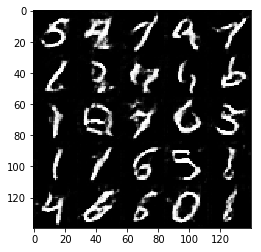

Epoch 2/2... Discriminator Loss: 0.8524... Generator Loss: 1.1505
Epoch 2/2... Discriminator Loss: 1.1069... Generator Loss: 0.7825
Epoch 2/2... Discriminator Loss: 1.0913... Generator Loss: 0.7514
Epoch 2/2... Discriminator Loss: 0.8786... Generator Loss: 1.1362
Epoch 2/2... Discriminator Loss: 0.7383... Generator Loss: 2.2083
Epoch 2/2... Discriminator Loss: 0.7313... Generator Loss: 2.0036
Epoch 2/2... Discriminator Loss: 0.7290... Generator Loss: 1.3871
Epoch 2/2... Discriminator Loss: 0.6937... Generator Loss: 1.6265
Epoch 2/2... Discriminator Loss: 0.6098... Generator Loss: 2.0453
Epoch 2/2... Discriminator Loss: 1.2826... Generator Loss: 0.7582


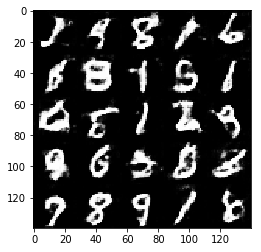

Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.8865
Epoch 2/2... Discriminator Loss: 1.1752... Generator Loss: 0.7479
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.6009
Epoch 2/2... Discriminator Loss: 1.0599... Generator Loss: 0.7794
Epoch 2/2... Discriminator Loss: 0.7494... Generator Loss: 1.6486
Epoch 2/2... Discriminator Loss: 1.0749... Generator Loss: 0.7607
Epoch 2/2... Discriminator Loss: 0.9874... Generator Loss: 0.9232


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.5232... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.5680... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.3170
Epoch 1/1... Discriminator Loss: 0.3905... Generator Loss: 4.7448
Epoch 1/1... Discriminator Loss: 0.3910... Generator Loss: 4.7977
Epoch 1/1... Discriminator Loss: 0.4882... Generator Loss: 2.9040
Epoch 1/1... Discriminator Loss: 0.4935... Generator Loss: 2.9112
Epoch 1/1... Discriminator Loss: 0.3820... Generator Loss: 6.1340
Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 9.2006
Epoch 1/1... Discriminator Loss: 0.3861... Generator Loss: 4.2448


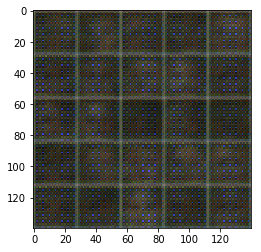

Epoch 1/1... Discriminator Loss: 0.5213... Generator Loss: 2.6945
Epoch 1/1... Discriminator Loss: 0.5584... Generator Loss: 8.3315
Epoch 1/1... Discriminator Loss: 0.7088... Generator Loss: 4.2135
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.9411
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 3.2227
Epoch 1/1... Discriminator Loss: 0.4895... Generator Loss: 2.8634
Epoch 1/1... Discriminator Loss: 0.4440... Generator Loss: 2.9965
Epoch 1/1... Discriminator Loss: 0.4052... Generator Loss: 4.8964
Epoch 1/1... Discriminator Loss: 0.4019... Generator Loss: 3.5766
Epoch 1/1... Discriminator Loss: 0.5028... Generator Loss: 2.3022


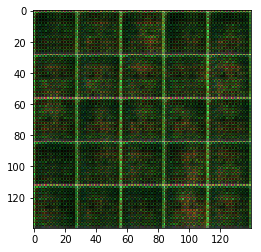

Epoch 1/1... Discriminator Loss: 0.4863... Generator Loss: 6.0333
Epoch 1/1... Discriminator Loss: 0.7754... Generator Loss: 3.2029
Epoch 1/1... Discriminator Loss: 0.6902... Generator Loss: 2.5571
Epoch 1/1... Discriminator Loss: 0.8488... Generator Loss: 2.0776
Epoch 1/1... Discriminator Loss: 0.7658... Generator Loss: 1.3004
Epoch 1/1... Discriminator Loss: 1.8984... Generator Loss: 0.3542
Epoch 1/1... Discriminator Loss: 0.8564... Generator Loss: 1.4918
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.4182
Epoch 1/1... Discriminator Loss: 0.7089... Generator Loss: 1.8602
Epoch 1/1... Discriminator Loss: 0.6017... Generator Loss: 1.8041


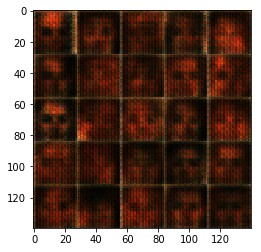

Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 0.5363... Generator Loss: 2.5741
Epoch 1/1... Discriminator Loss: 0.9415... Generator Loss: 1.7405
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.5068
Epoch 1/1... Discriminator Loss: 0.7979... Generator Loss: 1.4848
Epoch 1/1... Discriminator Loss: 0.4808... Generator Loss: 2.7066
Epoch 1/1... Discriminator Loss: 0.6497... Generator Loss: 3.8552
Epoch 1/1... Discriminator Loss: 0.4993... Generator Loss: 3.2718
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 7.4211
Epoch 1/1... Discriminator Loss: 0.5218... Generator Loss: 2.4915


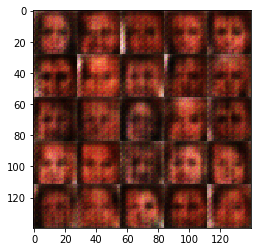

Epoch 1/1... Discriminator Loss: 0.8090... Generator Loss: 4.6935
Epoch 1/1... Discriminator Loss: 0.4081... Generator Loss: 4.9032
Epoch 1/1... Discriminator Loss: 1.8135... Generator Loss: 0.4210
Epoch 1/1... Discriminator Loss: 0.4005... Generator Loss: 5.9130
Epoch 1/1... Discriminator Loss: 0.3520... Generator Loss: 6.1840
Epoch 1/1... Discriminator Loss: 0.5347... Generator Loss: 2.1947
Epoch 1/1... Discriminator Loss: 1.5891... Generator Loss: 0.5321
Epoch 1/1... Discriminator Loss: 0.8741... Generator Loss: 1.1304
Epoch 1/1... Discriminator Loss: 1.5812... Generator Loss: 4.3809
Epoch 1/1... Discriminator Loss: 0.9280... Generator Loss: 1.0283


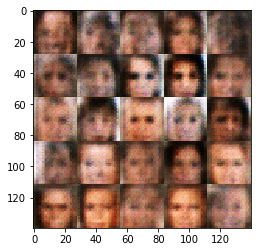

Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 8.6816
Epoch 1/1... Discriminator Loss: 0.3980... Generator Loss: 3.5662
Epoch 1/1... Discriminator Loss: 0.4761... Generator Loss: 3.2091
Epoch 1/1... Discriminator Loss: 0.5949... Generator Loss: 4.1344
Epoch 1/1... Discriminator Loss: 0.7105... Generator Loss: 1.7900
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 3.1829
Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.4195
Epoch 1/1... Discriminator Loss: 0.5083... Generator Loss: 2.4677
Epoch 1/1... Discriminator Loss: 0.5636... Generator Loss: 2.1101
Epoch 1/1... Discriminator Loss: 0.6349... Generator Loss: 2.0002


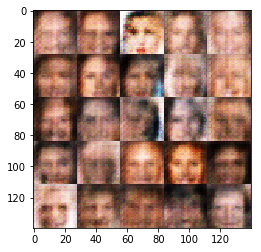

Epoch 1/1... Discriminator Loss: 0.7864... Generator Loss: 1.3734
Epoch 1/1... Discriminator Loss: 0.5031... Generator Loss: 3.6003
Epoch 1/1... Discriminator Loss: 0.7039... Generator Loss: 2.4801
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 1.1129
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 2.9013
Epoch 1/1... Discriminator Loss: 0.4647... Generator Loss: 3.6477
Epoch 1/1... Discriminator Loss: 0.6208... Generator Loss: 2.3235
Epoch 1/1... Discriminator Loss: 2.7990... Generator Loss: 0.1155
Epoch 1/1... Discriminator Loss: 0.6466... Generator Loss: 1.6973
Epoch 1/1... Discriminator Loss: 0.6435... Generator Loss: 3.2019


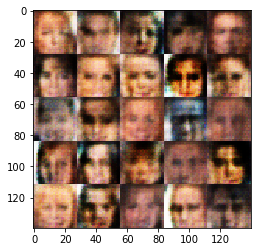

Epoch 1/1... Discriminator Loss: 0.8292... Generator Loss: 1.3608
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 1.0503
Epoch 1/1... Discriminator Loss: 0.7441... Generator Loss: 1.3287
Epoch 1/1... Discriminator Loss: 0.8089... Generator Loss: 1.2468
Epoch 1/1... Discriminator Loss: 0.5885... Generator Loss: 3.3557
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 2.4823
Epoch 1/1... Discriminator Loss: 0.7865... Generator Loss: 1.3479
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 0.5694... Generator Loss: 2.1405
Epoch 1/1... Discriminator Loss: 0.5600... Generator Loss: 7.2188


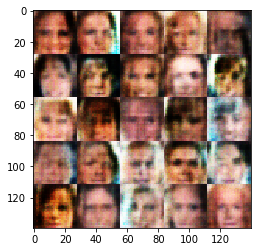

Epoch 1/1... Discriminator Loss: 1.5316... Generator Loss: 0.4881
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 1.4223
Epoch 1/1... Discriminator Loss: 0.5694... Generator Loss: 2.4833
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.1559
Epoch 1/1... Discriminator Loss: 0.6210... Generator Loss: 1.8155
Epoch 1/1... Discriminator Loss: 0.9474... Generator Loss: 1.1919
Epoch 1/1... Discriminator Loss: 1.1058... Generator Loss: 0.8847
Epoch 1/1... Discriminator Loss: 0.5573... Generator Loss: 1.8447
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 3.7715
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 0.7338


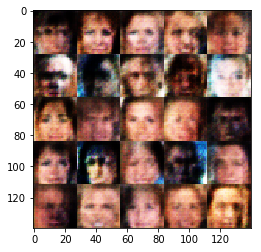

Epoch 1/1... Discriminator Loss: 0.5013... Generator Loss: 4.3161
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 1.1800
Epoch 1/1... Discriminator Loss: 0.8673... Generator Loss: 1.1347
Epoch 1/1... Discriminator Loss: 0.4551... Generator Loss: 8.4229
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 0.5509... Generator Loss: 2.0461
Epoch 1/1... Discriminator Loss: 0.3598... Generator Loss: 4.8176
Epoch 1/1... Discriminator Loss: 0.3702... Generator Loss: 4.3466
Epoch 1/1... Discriminator Loss: 0.4839... Generator Loss: 6.2298
Epoch 1/1... Discriminator Loss: 0.7834... Generator Loss: 1.3512


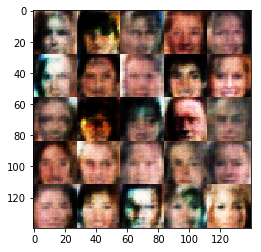

Epoch 1/1... Discriminator Loss: 0.9801... Generator Loss: 4.5369
Epoch 1/1... Discriminator Loss: 0.4157... Generator Loss: 3.5070
Epoch 1/1... Discriminator Loss: 0.6651... Generator Loss: 1.5095
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 0.3976... Generator Loss: 3.4600
Epoch 1/1... Discriminator Loss: 0.4624... Generator Loss: 2.7196
Epoch 1/1... Discriminator Loss: 0.4582... Generator Loss: 3.0171
Epoch 1/1... Discriminator Loss: 0.7807... Generator Loss: 1.2703
Epoch 1/1... Discriminator Loss: 0.3571... Generator Loss: 5.0251
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.7054


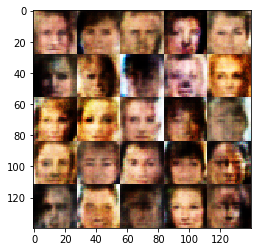

Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 0.9156
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 4.0891
Epoch 1/1... Discriminator Loss: 0.4614... Generator Loss: 2.7347
Epoch 1/1... Discriminator Loss: 0.5519... Generator Loss: 1.8622
Epoch 1/1... Discriminator Loss: 1.6648... Generator Loss: 0.4102
Epoch 1/1... Discriminator Loss: 0.5553... Generator Loss: 2.1388
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 2.3295
Epoch 1/1... Discriminator Loss: 0.7035... Generator Loss: 1.4841
Epoch 1/1... Discriminator Loss: 0.6333... Generator Loss: 1.6856
Epoch 1/1... Discriminator Loss: 0.9648... Generator Loss: 1.0405


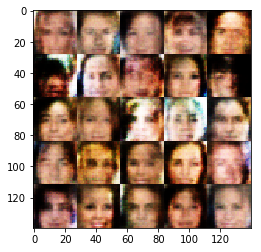

Epoch 1/1... Discriminator Loss: 0.3758... Generator Loss: 4.0686
Epoch 1/1... Discriminator Loss: 0.3693... Generator Loss: 5.2317
Epoch 1/1... Discriminator Loss: 0.4168... Generator Loss: 4.5415
Epoch 1/1... Discriminator Loss: 0.4007... Generator Loss: 5.3548
Epoch 1/1... Discriminator Loss: 0.3944... Generator Loss: 5.0916
Epoch 1/1... Discriminator Loss: 0.4204... Generator Loss: 3.0409
Epoch 1/1... Discriminator Loss: 0.4323... Generator Loss: 3.0637
Epoch 1/1... Discriminator Loss: 0.4295... Generator Loss: 3.6246
Epoch 1/1... Discriminator Loss: 0.6659... Generator Loss: 1.4707
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 6.1452


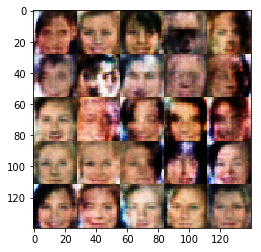

Epoch 1/1... Discriminator Loss: 0.4383... Generator Loss: 2.7535
Epoch 1/1... Discriminator Loss: 0.3491... Generator Loss: 4.8140
Epoch 1/1... Discriminator Loss: 0.6065... Generator Loss: 2.0370
Epoch 1/1... Discriminator Loss: 0.5275... Generator Loss: 5.9351
Epoch 1/1... Discriminator Loss: 0.4032... Generator Loss: 3.5866
Epoch 1/1... Discriminator Loss: 0.3825... Generator Loss: 5.5375
Epoch 1/1... Discriminator Loss: 0.6047... Generator Loss: 2.2889
Epoch 1/1... Discriminator Loss: 1.2244... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 0.3697... Generator Loss: 4.4635
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.5286


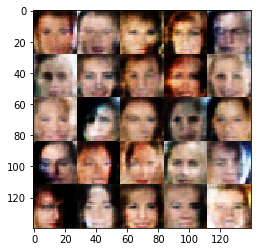

Epoch 1/1... Discriminator Loss: 0.7728... Generator Loss: 2.2365
Epoch 1/1... Discriminator Loss: 0.3798... Generator Loss: 4.4191
Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 0.6790
Epoch 1/1... Discriminator Loss: 0.6235... Generator Loss: 1.8332
Epoch 1/1... Discriminator Loss: 0.3660... Generator Loss: 5.6642
Epoch 1/1... Discriminator Loss: 0.3961... Generator Loss: 3.5858
Epoch 1/1... Discriminator Loss: 0.3668... Generator Loss: 5.9825
Epoch 1/1... Discriminator Loss: 0.3742... Generator Loss: 5.7964
Epoch 1/1... Discriminator Loss: 0.5799... Generator Loss: 7.1196
Epoch 1/1... Discriminator Loss: 0.4906... Generator Loss: 2.1944


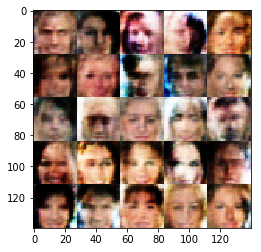

Epoch 1/1... Discriminator Loss: 0.4824... Generator Loss: 5.4097
Epoch 1/1... Discriminator Loss: 0.4354... Generator Loss: 7.9607
Epoch 1/1... Discriminator Loss: 0.9228... Generator Loss: 0.9955
Epoch 1/1... Discriminator Loss: 0.3943... Generator Loss: 4.1183
Epoch 1/1... Discriminator Loss: 0.3820... Generator Loss: 4.0614
Epoch 1/1... Discriminator Loss: 0.3543... Generator Loss: 5.7818
Epoch 1/1... Discriminator Loss: 0.3731... Generator Loss: 5.9605
Epoch 1/1... Discriminator Loss: 0.4680... Generator Loss: 5.8576
Epoch 1/1... Discriminator Loss: 0.7731... Generator Loss: 1.2671
Epoch 1/1... Discriminator Loss: 0.3753... Generator Loss: 4.1979


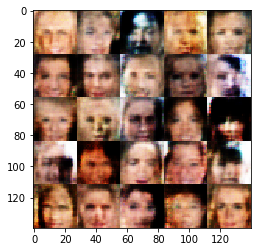

Epoch 1/1... Discriminator Loss: 0.3909... Generator Loss: 3.7714
Epoch 1/1... Discriminator Loss: 0.3624... Generator Loss: 4.8726
Epoch 1/1... Discriminator Loss: 0.3815... Generator Loss: 3.5729
Epoch 1/1... Discriminator Loss: 0.6939... Generator Loss: 1.5288
Epoch 1/1... Discriminator Loss: 0.3798... Generator Loss: 4.6761
Epoch 1/1... Discriminator Loss: 0.5095... Generator Loss: 3.2870
Epoch 1/1... Discriminator Loss: 0.4317... Generator Loss: 3.8415
Epoch 1/1... Discriminator Loss: 0.5339... Generator Loss: 3.3932
Epoch 1/1... Discriminator Loss: 0.4262... Generator Loss: 3.1039
Epoch 1/1... Discriminator Loss: 0.3778... Generator Loss: 3.6924


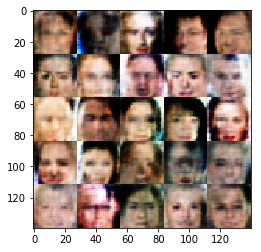

Epoch 1/1... Discriminator Loss: 0.3979... Generator Loss: 3.7165
Epoch 1/1... Discriminator Loss: 0.7629... Generator Loss: 1.3643
Epoch 1/1... Discriminator Loss: 0.3965... Generator Loss: 3.3696
Epoch 1/1... Discriminator Loss: 0.3813... Generator Loss: 5.4096
Epoch 1/1... Discriminator Loss: 0.4442... Generator Loss: 6.6058
Epoch 1/1... Discriminator Loss: 0.7063... Generator Loss: 1.3633
Epoch 1/1... Discriminator Loss: 0.3766... Generator Loss: 4.1960
Epoch 1/1... Discriminator Loss: 0.4918... Generator Loss: 2.4254
Epoch 1/1... Discriminator Loss: 0.3553... Generator Loss: 5.6499
Epoch 1/1... Discriminator Loss: 0.8236... Generator Loss: 6.7267


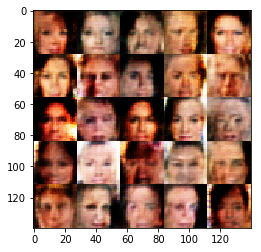

Epoch 1/1... Discriminator Loss: 0.5215... Generator Loss: 2.1625
Epoch 1/1... Discriminator Loss: 0.3999... Generator Loss: 3.7583
Epoch 1/1... Discriminator Loss: 0.5304... Generator Loss: 5.3558
Epoch 1/1... Discriminator Loss: 0.4655... Generator Loss: 2.7621
Epoch 1/1... Discriminator Loss: 0.3489... Generator Loss: 5.7252
Epoch 1/1... Discriminator Loss: 1.4582... Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 0.4613... Generator Loss: 4.9947
Epoch 1/1... Discriminator Loss: 0.3724... Generator Loss: 4.4901
Epoch 1/1... Discriminator Loss: 0.3574... Generator Loss: 5.2720
Epoch 1/1... Discriminator Loss: 0.3672... Generator Loss: 4.2696


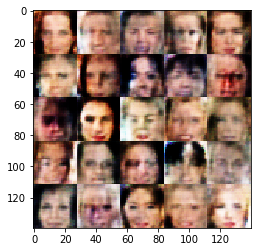

Epoch 1/1... Discriminator Loss: 0.6770... Generator Loss: 5.1839
Epoch 1/1... Discriminator Loss: 0.4007... Generator Loss: 3.2155
Epoch 1/1... Discriminator Loss: 0.5058... Generator Loss: 2.2517
Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 3.8308
Epoch 1/1... Discriminator Loss: 0.3548... Generator Loss: 5.1680
Epoch 1/1... Discriminator Loss: 0.3878... Generator Loss: 3.3236
Epoch 1/1... Discriminator Loss: 0.3515... Generator Loss: 6.0910
Epoch 1/1... Discriminator Loss: 0.9185... Generator Loss: 1.0335
Epoch 1/1... Discriminator Loss: 0.3814... Generator Loss: 4.3340
Epoch 1/1... Discriminator Loss: 0.3637... Generator Loss: 4.5083


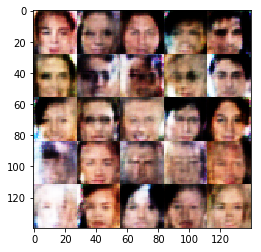

Epoch 1/1... Discriminator Loss: 0.3631... Generator Loss: 5.6432
Epoch 1/1... Discriminator Loss: 0.5387... Generator Loss: 2.5618
Epoch 1/1... Discriminator Loss: 0.3719... Generator Loss: 4.6343
Epoch 1/1... Discriminator Loss: 0.3960... Generator Loss: 3.8089
Epoch 1/1... Discriminator Loss: 0.5086... Generator Loss: 2.1553
Epoch 1/1... Discriminator Loss: 0.4207... Generator Loss: 5.8453
Epoch 1/1... Discriminator Loss: 0.3798... Generator Loss: 4.0960
Epoch 1/1... Discriminator Loss: 0.4248... Generator Loss: 6.0027
Epoch 1/1... Discriminator Loss: 0.4204... Generator Loss: 6.4827
Epoch 1/1... Discriminator Loss: 0.3967... Generator Loss: 3.7504


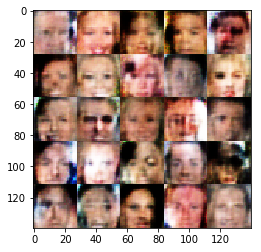

Epoch 1/1... Discriminator Loss: 0.4364... Generator Loss: 5.3740
Epoch 1/1... Discriminator Loss: 0.3770... Generator Loss: 3.6285
Epoch 1/1... Discriminator Loss: 0.4750... Generator Loss: 2.4272
Epoch 1/1... Discriminator Loss: 0.4785... Generator Loss: 2.9391
Epoch 1/1... Discriminator Loss: 0.4820... Generator Loss: 2.4462
Epoch 1/1... Discriminator Loss: 0.4222... Generator Loss: 3.4064
Epoch 1/1... Discriminator Loss: 0.3657... Generator Loss: 4.3100
Epoch 1/1... Discriminator Loss: 0.4615... Generator Loss: 2.6216
Epoch 1/1... Discriminator Loss: 0.3739... Generator Loss: 4.1592
Epoch 1/1... Discriminator Loss: 0.4093... Generator Loss: 7.0911


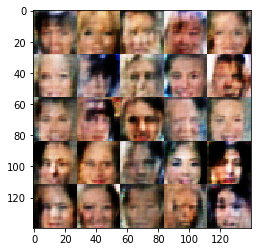

Epoch 1/1... Discriminator Loss: 0.3828... Generator Loss: 5.3303
Epoch 1/1... Discriminator Loss: 0.4521... Generator Loss: 2.5241
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 4.9990
Epoch 1/1... Discriminator Loss: 0.5305... Generator Loss: 3.5828
Epoch 1/1... Discriminator Loss: 0.8757... Generator Loss: 1.3532
Epoch 1/1... Discriminator Loss: 0.4112... Generator Loss: 3.1773
Epoch 1/1... Discriminator Loss: 0.4242... Generator Loss: 2.7231
Epoch 1/1... Discriminator Loss: 0.7453... Generator Loss: 1.4615
Epoch 1/1... Discriminator Loss: 0.3649... Generator Loss: 5.3372
Epoch 1/1... Discriminator Loss: 0.3836... Generator Loss: 3.4633


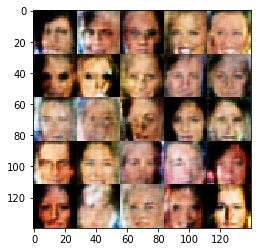

Epoch 1/1... Discriminator Loss: 0.7558... Generator Loss: 1.3664
Epoch 1/1... Discriminator Loss: 0.3598... Generator Loss: 5.2081
Epoch 1/1... Discriminator Loss: 0.3605... Generator Loss: 4.3403
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 3.5932
Epoch 1/1... Discriminator Loss: 0.3605... Generator Loss: 7.2934
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 3.1476
Epoch 1/1... Discriminator Loss: 0.3681... Generator Loss: 4.1247
Epoch 1/1... Discriminator Loss: 0.4225... Generator Loss: 6.6621
Epoch 1/1... Discriminator Loss: 0.3925... Generator Loss: 3.6974
Epoch 1/1... Discriminator Loss: 0.4248... Generator Loss: 2.9627


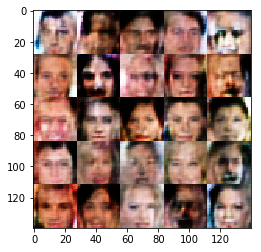

Epoch 1/1... Discriminator Loss: 0.4047... Generator Loss: 3.2697
Epoch 1/1... Discriminator Loss: 0.3528... Generator Loss: 4.8709
Epoch 1/1... Discriminator Loss: 0.3883... Generator Loss: 3.5533
Epoch 1/1... Discriminator Loss: 0.6578... Generator Loss: 1.8539
Epoch 1/1... Discriminator Loss: 0.3698... Generator Loss: 4.1618
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 4.0475
Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 4.8451
Epoch 1/1... Discriminator Loss: 0.4127... Generator Loss: 3.3605
Epoch 1/1... Discriminator Loss: 0.3487... Generator Loss: 5.9820
Epoch 1/1... Discriminator Loss: 0.8007... Generator Loss: 1.4114


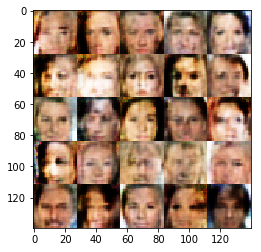

Epoch 1/1... Discriminator Loss: 0.3567... Generator Loss: 5.0830
Epoch 1/1... Discriminator Loss: 0.5148... Generator Loss: 2.2558
Epoch 1/1... Discriminator Loss: 0.7649... Generator Loss: 1.3103
Epoch 1/1... Discriminator Loss: 0.5028... Generator Loss: 2.3928
Epoch 1/1... Discriminator Loss: 0.3982... Generator Loss: 3.8206
Epoch 1/1... Discriminator Loss: 0.3580... Generator Loss: 4.3938
Epoch 1/1... Discriminator Loss: 0.3582... Generator Loss: 5.4990
Epoch 1/1... Discriminator Loss: 0.4770... Generator Loss: 5.8429
Epoch 1/1... Discriminator Loss: 0.3655... Generator Loss: 4.6002
Epoch 1/1... Discriminator Loss: 0.5706... Generator Loss: 2.1484


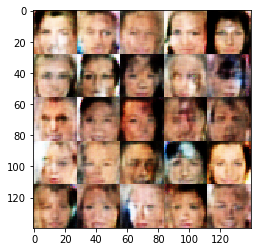

Epoch 1/1... Discriminator Loss: 2.0990... Generator Loss: 4.6614
Epoch 1/1... Discriminator Loss: 0.5880... Generator Loss: 1.9710
Epoch 1/1... Discriminator Loss: 0.3772... Generator Loss: 4.4919
Epoch 1/1... Discriminator Loss: 0.4734... Generator Loss: 2.4383
Epoch 1/1... Discriminator Loss: 0.4077... Generator Loss: 3.3213
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 4.4510
Epoch 1/1... Discriminator Loss: 0.4856... Generator Loss: 2.6626
Epoch 1/1... Discriminator Loss: 0.4019... Generator Loss: 3.1183
Epoch 1/1... Discriminator Loss: 0.5178... Generator Loss: 2.2909
Epoch 1/1... Discriminator Loss: 0.3645... Generator Loss: 4.2472


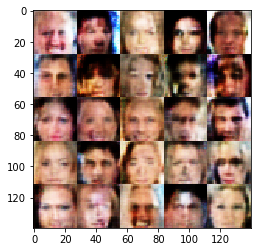

Epoch 1/1... Discriminator Loss: 0.3857... Generator Loss: 4.1749
Epoch 1/1... Discriminator Loss: 0.3542... Generator Loss: 4.8521
Epoch 1/1... Discriminator Loss: 0.3704... Generator Loss: 4.8396
Epoch 1/1... Discriminator Loss: 0.3965... Generator Loss: 3.1891
Epoch 1/1... Discriminator Loss: 0.4027... Generator Loss: 3.8465
Epoch 1/1... Discriminator Loss: 0.3672... Generator Loss: 4.6172
Epoch 1/1... Discriminator Loss: 0.4442... Generator Loss: 2.7836
Epoch 1/1... Discriminator Loss: 0.3897... Generator Loss: 4.0161
Epoch 1/1... Discriminator Loss: 0.4063... Generator Loss: 3.4210
Epoch 1/1... Discriminator Loss: 0.3780... Generator Loss: 3.8043


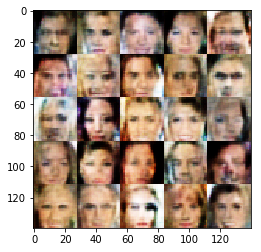

Epoch 1/1... Discriminator Loss: 0.4678... Generator Loss: 4.1736
Epoch 1/1... Discriminator Loss: 0.3975... Generator Loss: 3.2456
Epoch 1/1... Discriminator Loss: 0.3845... Generator Loss: 4.4132
Epoch 1/1... Discriminator Loss: 0.5002... Generator Loss: 2.4750
Epoch 1/1... Discriminator Loss: 0.4862... Generator Loss: 2.5255
Epoch 1/1... Discriminator Loss: 0.3954... Generator Loss: 3.8631
Epoch 1/1... Discriminator Loss: 0.4320... Generator Loss: 4.3118
Epoch 1/1... Discriminator Loss: 0.4585... Generator Loss: 2.4157
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 4.5075
Epoch 1/1... Discriminator Loss: 0.3528... Generator Loss: 6.0641


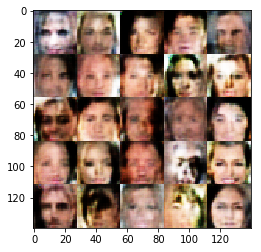

Epoch 1/1... Discriminator Loss: 0.3676... Generator Loss: 4.4356
Epoch 1/1... Discriminator Loss: 0.6353... Generator Loss: 5.5266
Epoch 1/1... Discriminator Loss: 0.4093... Generator Loss: 5.6174
Epoch 1/1... Discriminator Loss: 0.5776... Generator Loss: 1.8680
Epoch 1/1... Discriminator Loss: 0.3890... Generator Loss: 4.1814
Epoch 1/1... Discriminator Loss: 0.4801... Generator Loss: 2.4994
Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 2.7986
Epoch 1/1... Discriminator Loss: 0.3751... Generator Loss: 4.0531
Epoch 1/1... Discriminator Loss: 0.3838... Generator Loss: 4.4693
Epoch 1/1... Discriminator Loss: 0.7457... Generator Loss: 3.0848


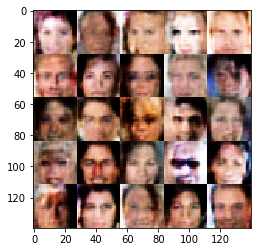

Epoch 1/1... Discriminator Loss: 0.6047... Generator Loss: 3.4119
Epoch 1/1... Discriminator Loss: 0.3976... Generator Loss: 3.6517
Epoch 1/1... Discriminator Loss: 0.4177... Generator Loss: 3.3835
Epoch 1/1... Discriminator Loss: 0.4421... Generator Loss: 2.9527
Epoch 1/1... Discriminator Loss: 0.3704... Generator Loss: 5.5489
Epoch 1/1... Discriminator Loss: 0.3699... Generator Loss: 4.1457
Epoch 1/1... Discriminator Loss: 0.4542... Generator Loss: 2.4605
Epoch 1/1... Discriminator Loss: 0.3539... Generator Loss: 5.4710
Epoch 1/1... Discriminator Loss: 0.4321... Generator Loss: 4.8340
Epoch 1/1... Discriminator Loss: 0.6445... Generator Loss: 2.5278


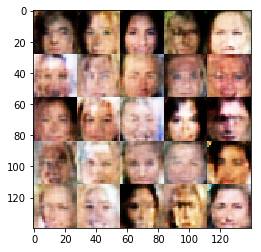

Epoch 1/1... Discriminator Loss: 0.3845... Generator Loss: 5.1392
Epoch 1/1... Discriminator Loss: 0.3917... Generator Loss: 3.5527
Epoch 1/1... Discriminator Loss: 0.4916... Generator Loss: 2.3758
Epoch 1/1... Discriminator Loss: 0.4191... Generator Loss: 2.8275
Epoch 1/1... Discriminator Loss: 1.7605... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 0.4040... Generator Loss: 3.2427
Epoch 1/1... Discriminator Loss: 0.3913... Generator Loss: 3.6203
Epoch 1/1... Discriminator Loss: 0.3657... Generator Loss: 4.7406
Epoch 1/1... Discriminator Loss: 0.4106... Generator Loss: 3.1721
Epoch 1/1... Discriminator Loss: 0.3726... Generator Loss: 7.7368


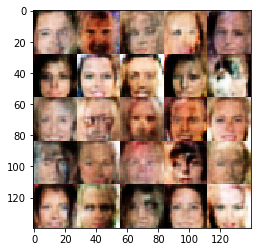

Epoch 1/1... Discriminator Loss: 0.4053... Generator Loss: 3.4652
Epoch 1/1... Discriminator Loss: 0.5545... Generator Loss: 2.2105
Epoch 1/1... Discriminator Loss: 0.3737... Generator Loss: 4.0852
Epoch 1/1... Discriminator Loss: 0.3796... Generator Loss: 4.4196
Epoch 1/1... Discriminator Loss: 0.3444... Generator Loss: 4.9650
Epoch 1/1... Discriminator Loss: 0.3484... Generator Loss: 5.3727
Epoch 1/1... Discriminator Loss: 0.4095... Generator Loss: 4.3493
Epoch 1/1... Discriminator Loss: 0.4250... Generator Loss: 2.8466
Epoch 1/1... Discriminator Loss: 0.3692... Generator Loss: 3.7281
Epoch 1/1... Discriminator Loss: 0.5701... Generator Loss: 1.7508


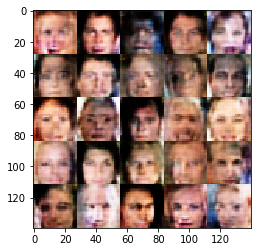

Epoch 1/1... Discriminator Loss: 0.4022... Generator Loss: 4.4191
Epoch 1/1... Discriminator Loss: 0.3870... Generator Loss: 5.5422
Epoch 1/1... Discriminator Loss: 0.4570... Generator Loss: 2.9951
Epoch 1/1... Discriminator Loss: 0.3965... Generator Loss: 3.9271
Epoch 1/1... Discriminator Loss: 1.1924... Generator Loss: 4.9044
Epoch 1/1... Discriminator Loss: 0.4380... Generator Loss: 3.6917
Epoch 1/1... Discriminator Loss: 0.3793... Generator Loss: 4.2072
Epoch 1/1... Discriminator Loss: 0.3747... Generator Loss: 4.3648
Epoch 1/1... Discriminator Loss: 0.4099... Generator Loss: 4.4466
Epoch 1/1... Discriminator Loss: 0.3923... Generator Loss: 3.4559


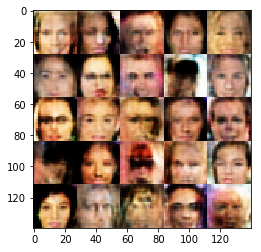

Epoch 1/1... Discriminator Loss: 0.3882... Generator Loss: 3.9768
Epoch 1/1... Discriminator Loss: 0.3447... Generator Loss: 7.0506
Epoch 1/1... Discriminator Loss: 0.3905... Generator Loss: 3.8825
Epoch 1/1... Discriminator Loss: 0.4112... Generator Loss: 3.4055
Epoch 1/1... Discriminator Loss: 2.7357... Generator Loss: 0.1736
Epoch 1/1... Discriminator Loss: 1.7152... Generator Loss: 0.4226
Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 1.0750
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 1.6232
Epoch 1/1... Discriminator Loss: 0.5162... Generator Loss: 2.2733
Epoch 1/1... Discriminator Loss: 0.5784... Generator Loss: 1.8714


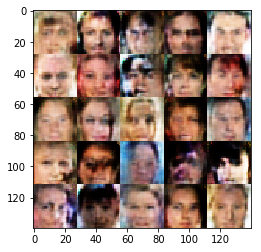

Epoch 1/1... Discriminator Loss: 0.7184... Generator Loss: 1.3969
Epoch 1/1... Discriminator Loss: 0.3998... Generator Loss: 5.2428
Epoch 1/1... Discriminator Loss: 0.7921... Generator Loss: 4.8140
Epoch 1/1... Discriminator Loss: 0.7069... Generator Loss: 3.4838
Epoch 1/1... Discriminator Loss: 0.7640... Generator Loss: 1.3933
Epoch 1/1... Discriminator Loss: 0.5590... Generator Loss: 2.8482
Epoch 1/1... Discriminator Loss: 0.5308... Generator Loss: 2.5158
Epoch 1/1... Discriminator Loss: 0.3518... Generator Loss: 4.5273
Epoch 1/1... Discriminator Loss: 0.3726... Generator Loss: 4.8757
Epoch 1/1... Discriminator Loss: 0.5535... Generator Loss: 1.8454


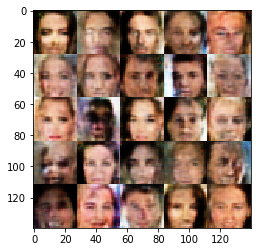

Epoch 1/1... Discriminator Loss: 0.5870... Generator Loss: 1.9391
Epoch 1/1... Discriminator Loss: 0.3825... Generator Loss: 3.7586
Epoch 1/1... Discriminator Loss: 0.5647... Generator Loss: 2.0312
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.0156
Epoch 1/1... Discriminator Loss: 0.4012... Generator Loss: 4.3522
Epoch 1/1... Discriminator Loss: 0.3629... Generator Loss: 5.2542
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 1.2861
Epoch 1/1... Discriminator Loss: 0.3468... Generator Loss: 5.3941
Epoch 1/1... Discriminator Loss: 0.8666... Generator Loss: 1.4736
Epoch 1/1... Discriminator Loss: 0.3895... Generator Loss: 3.9029


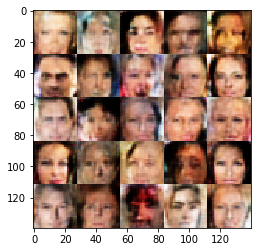

Epoch 1/1... Discriminator Loss: 0.3687... Generator Loss: 6.5744
Epoch 1/1... Discriminator Loss: 0.4388... Generator Loss: 2.9625
Epoch 1/1... Discriminator Loss: 0.3725... Generator Loss: 4.0301
Epoch 1/1... Discriminator Loss: 0.3731... Generator Loss: 4.2989
Epoch 1/1... Discriminator Loss: 0.4001... Generator Loss: 3.8295
Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 3.8455
Epoch 1/1... Discriminator Loss: 0.3583... Generator Loss: 5.8277
Epoch 1/1... Discriminator Loss: 0.3644... Generator Loss: 4.8671
Epoch 1/1... Discriminator Loss: 0.5672... Generator Loss: 2.2696
Epoch 1/1... Discriminator Loss: 0.4420... Generator Loss: 2.5860


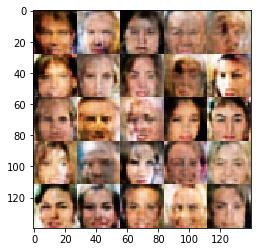

Epoch 1/1... Discriminator Loss: 0.6009... Generator Loss: 5.9458
Epoch 1/1... Discriminator Loss: 0.3907... Generator Loss: 3.6877
Epoch 1/1... Discriminator Loss: 0.4014... Generator Loss: 3.2788
Epoch 1/1... Discriminator Loss: 0.4644... Generator Loss: 2.4271
Epoch 1/1... Discriminator Loss: 0.8447... Generator Loss: 5.2515
Epoch 1/1... Discriminator Loss: 0.6476... Generator Loss: 2.1665
Epoch 1/1... Discriminator Loss: 0.4234... Generator Loss: 2.8844
Epoch 1/1... Discriminator Loss: 0.4278... Generator Loss: 2.8765
Epoch 1/1... Discriminator Loss: 0.3624... Generator Loss: 4.6456
Epoch 1/1... Discriminator Loss: 0.4174... Generator Loss: 2.8894


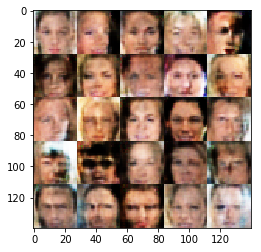

Epoch 1/1... Discriminator Loss: 0.4301... Generator Loss: 2.7390
Epoch 1/1... Discriminator Loss: 1.6808... Generator Loss: 0.7769
Epoch 1/1... Discriminator Loss: 0.3819... Generator Loss: 3.9994
Epoch 1/1... Discriminator Loss: 0.3900... Generator Loss: 3.7121
Epoch 1/1... Discriminator Loss: 0.4803... Generator Loss: 2.4296
Epoch 1/1... Discriminator Loss: 0.3861... Generator Loss: 3.9910
Epoch 1/1... Discriminator Loss: 0.3533... Generator Loss: 4.8061
Epoch 1/1... Discriminator Loss: 0.3673... Generator Loss: 4.3665
Epoch 1/1... Discriminator Loss: 0.4401... Generator Loss: 2.6719
Epoch 1/1... Discriminator Loss: 0.3788... Generator Loss: 3.7021


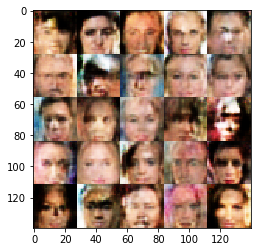

Epoch 1/1... Discriminator Loss: 0.3878... Generator Loss: 3.3863
Epoch 1/1... Discriminator Loss: 0.3813... Generator Loss: 3.7965
Epoch 1/1... Discriminator Loss: 0.3734... Generator Loss: 3.7814
Epoch 1/1... Discriminator Loss: 1.1515... Generator Loss: 3.9519
Epoch 1/1... Discriminator Loss: 0.4127... Generator Loss: 3.4701
Epoch 1/1... Discriminator Loss: 0.5790... Generator Loss: 1.9087
Epoch 1/1... Discriminator Loss: 0.5129... Generator Loss: 2.2886
Epoch 1/1... Discriminator Loss: 0.4747... Generator Loss: 2.3207
Epoch 1/1... Discriminator Loss: 0.3769... Generator Loss: 4.1465
Epoch 1/1... Discriminator Loss: 0.7492... Generator Loss: 1.5666


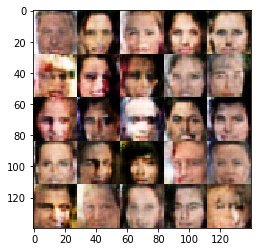

Epoch 1/1... Discriminator Loss: 0.3892... Generator Loss: 4.1693
Epoch 1/1... Discriminator Loss: 0.3749... Generator Loss: 3.9830
Epoch 1/1... Discriminator Loss: 0.3721... Generator Loss: 4.0049
Epoch 1/1... Discriminator Loss: 0.4582... Generator Loss: 2.5441
Epoch 1/1... Discriminator Loss: 0.3577... Generator Loss: 5.7033
Epoch 1/1... Discriminator Loss: 0.3525... Generator Loss: 4.6985
Epoch 1/1... Discriminator Loss: 0.4513... Generator Loss: 5.9426
Epoch 1/1... Discriminator Loss: 0.3672... Generator Loss: 3.9682
Epoch 1/1... Discriminator Loss: 0.4679... Generator Loss: 4.1661
Epoch 1/1... Discriminator Loss: 0.3735... Generator Loss: 4.0250


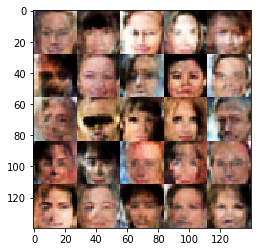

Epoch 1/1... Discriminator Loss: 1.2274... Generator Loss: 0.9192
Epoch 1/1... Discriminator Loss: 0.9380... Generator Loss: 1.2087
Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 4.6767
Epoch 1/1... Discriminator Loss: 0.4107... Generator Loss: 3.1784
Epoch 1/1... Discriminator Loss: 0.5067... Generator Loss: 3.0690
Epoch 1/1... Discriminator Loss: 0.4125... Generator Loss: 3.6778
Epoch 1/1... Discriminator Loss: 0.4249... Generator Loss: 2.9702
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 5.4113
Epoch 1/1... Discriminator Loss: 0.5151... Generator Loss: 3.3129
Epoch 1/1... Discriminator Loss: 0.5636... Generator Loss: 1.8247


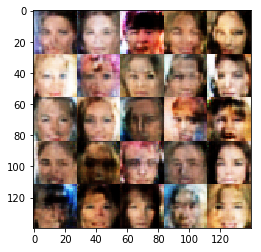

Epoch 1/1... Discriminator Loss: 0.4957... Generator Loss: 2.4528
Epoch 1/1... Discriminator Loss: 0.4460... Generator Loss: 2.7596
Epoch 1/1... Discriminator Loss: 0.3935... Generator Loss: 3.6899
Epoch 1/1... Discriminator Loss: 0.6764... Generator Loss: 2.0974
Epoch 1/1... Discriminator Loss: 0.5040... Generator Loss: 2.3777
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 4.1223
Epoch 1/1... Discriminator Loss: 0.3584... Generator Loss: 4.2671
Epoch 1/1... Discriminator Loss: 0.5982... Generator Loss: 1.7410
Epoch 1/1... Discriminator Loss: 0.4267... Generator Loss: 2.8557
Epoch 1/1... Discriminator Loss: 0.4026... Generator Loss: 3.4708


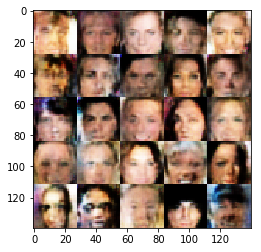

Epoch 1/1... Discriminator Loss: 0.3364... Generator Loss: 6.7489
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 0.9709
Epoch 1/1... Discriminator Loss: 0.4595... Generator Loss: 3.7743
Epoch 1/1... Discriminator Loss: 0.3571... Generator Loss: 4.4158
Epoch 1/1... Discriminator Loss: 2.3850... Generator Loss: 0.2174
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 3.3879
Epoch 1/1... Discriminator Loss: 0.3735... Generator Loss: 4.7004
Epoch 1/1... Discriminator Loss: 0.4423... Generator Loss: 2.6430
Epoch 1/1... Discriminator Loss: 0.4188... Generator Loss: 3.4834
Epoch 1/1... Discriminator Loss: 0.4053... Generator Loss: 3.0537


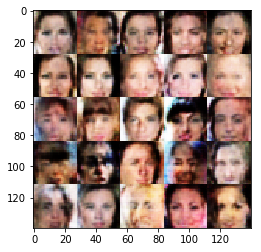

Epoch 1/1... Discriminator Loss: 0.3791... Generator Loss: 3.7484
Epoch 1/1... Discriminator Loss: 2.0824... Generator Loss: 0.3418
Epoch 1/1... Discriminator Loss: 0.4100... Generator Loss: 3.1548
Epoch 1/1... Discriminator Loss: 0.4070... Generator Loss: 3.1552
Epoch 1/1... Discriminator Loss: 0.4545... Generator Loss: 2.7506
Epoch 1/1... Discriminator Loss: 0.4156... Generator Loss: 4.1750
Epoch 1/1... Discriminator Loss: 0.4230... Generator Loss: 2.8999
Epoch 1/1... Discriminator Loss: 0.4217... Generator Loss: 3.1250
Epoch 1/1... Discriminator Loss: 0.4087... Generator Loss: 2.9061
Epoch 1/1... Discriminator Loss: 0.3876... Generator Loss: 3.7767


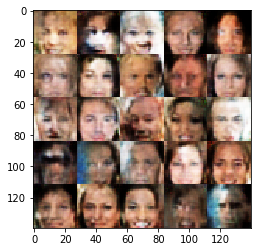

Epoch 1/1... Discriminator Loss: 0.4556... Generator Loss: 2.4915
Epoch 1/1... Discriminator Loss: 0.6621... Generator Loss: 1.5833
Epoch 1/1... Discriminator Loss: 0.3440... Generator Loss: 5.1083
Epoch 1/1... Discriminator Loss: 0.4043... Generator Loss: 3.2579
Epoch 1/1... Discriminator Loss: 0.7215... Generator Loss: 3.0557
Epoch 1/1... Discriminator Loss: 0.6829... Generator Loss: 2.0133
Epoch 1/1... Discriminator Loss: 0.4309... Generator Loss: 4.1326
Epoch 1/1... Discriminator Loss: 0.4684... Generator Loss: 2.7601
Epoch 1/1... Discriminator Loss: 0.6976... Generator Loss: 1.8048
Epoch 1/1... Discriminator Loss: 0.4594... Generator Loss: 2.4651


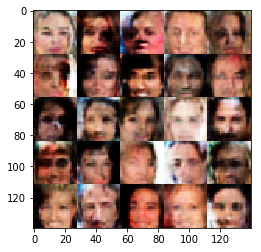

Epoch 1/1... Discriminator Loss: 0.4819... Generator Loss: 2.2498
Epoch 1/1... Discriminator Loss: 0.4335... Generator Loss: 2.7228
Epoch 1/1... Discriminator Loss: 0.3959... Generator Loss: 3.5148
Epoch 1/1... Discriminator Loss: 0.5244... Generator Loss: 3.8308
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 2.8447
Epoch 1/1... Discriminator Loss: 0.3882... Generator Loss: 4.2358
Epoch 1/1... Discriminator Loss: 0.4934... Generator Loss: 2.8610
Epoch 1/1... Discriminator Loss: 0.5237... Generator Loss: 2.1830
Epoch 1/1... Discriminator Loss: 0.4151... Generator Loss: 3.1312
Epoch 1/1... Discriminator Loss: 0.5645... Generator Loss: 1.8478


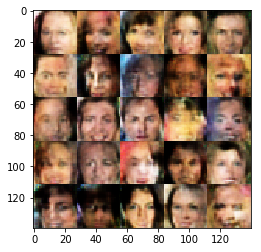

Epoch 1/1... Discriminator Loss: 0.3871... Generator Loss: 3.6801
Epoch 1/1... Discriminator Loss: 0.4779... Generator Loss: 2.3777
Epoch 1/1... Discriminator Loss: 0.5611... Generator Loss: 2.0047
Epoch 1/1... Discriminator Loss: 0.7158... Generator Loss: 1.6058
Epoch 1/1... Discriminator Loss: 1.6963... Generator Loss: 0.4716
Epoch 1/1... Discriminator Loss: 0.6683... Generator Loss: 1.8016
Epoch 1/1... Discriminator Loss: 0.4797... Generator Loss: 2.9485
Epoch 1/1... Discriminator Loss: 0.3834... Generator Loss: 5.2108
Epoch 1/1... Discriminator Loss: 0.4525... Generator Loss: 2.6971
Epoch 1/1... Discriminator Loss: 0.3820... Generator Loss: 3.3675


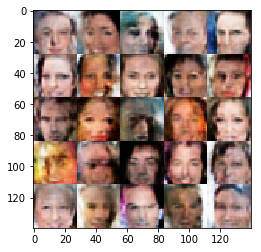

Epoch 1/1... Discriminator Loss: 0.5135... Generator Loss: 2.1227
Epoch 1/1... Discriminator Loss: 0.7954... Generator Loss: 3.5081
Epoch 1/1... Discriminator Loss: 0.3671... Generator Loss: 4.5058
Epoch 1/1... Discriminator Loss: 0.4063... Generator Loss: 3.3759
Epoch 1/1... Discriminator Loss: 0.4390... Generator Loss: 2.6877
Epoch 1/1... Discriminator Loss: 0.4172... Generator Loss: 3.0003
Epoch 1/1... Discriminator Loss: 0.5048... Generator Loss: 2.3572
Epoch 1/1... Discriminator Loss: 0.3670... Generator Loss: 4.4922
Epoch 1/1... Discriminator Loss: 2.0554... Generator Loss: 0.3506
Epoch 1/1... Discriminator Loss: 0.6345... Generator Loss: 1.6371


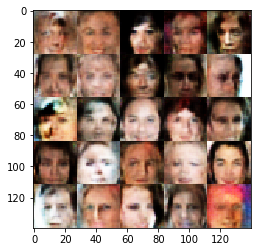

Epoch 1/1... Discriminator Loss: 0.4129... Generator Loss: 3.2286
Epoch 1/1... Discriminator Loss: 0.3939... Generator Loss: 3.1196
Epoch 1/1... Discriminator Loss: 0.3843... Generator Loss: 3.6048
Epoch 1/1... Discriminator Loss: 0.4036... Generator Loss: 3.1254
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.1312
Epoch 1/1... Discriminator Loss: 0.8164... Generator Loss: 3.6039
Epoch 1/1... Discriminator Loss: 0.4796... Generator Loss: 2.3125
Epoch 1/1... Discriminator Loss: 0.4853... Generator Loss: 2.9942
Epoch 1/1... Discriminator Loss: 0.4070... Generator Loss: 4.6763
Epoch 1/1... Discriminator Loss: 0.5020... Generator Loss: 3.8506


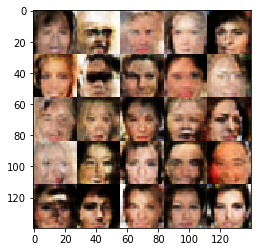

Epoch 1/1... Discriminator Loss: 0.6268... Generator Loss: 1.8360
Epoch 1/1... Discriminator Loss: 0.4656... Generator Loss: 2.3599
Epoch 1/1... Discriminator Loss: 0.5950... Generator Loss: 1.8899
Epoch 1/1... Discriminator Loss: 0.5735... Generator Loss: 1.9526
Epoch 1/1... Discriminator Loss: 0.3886... Generator Loss: 3.5287
Epoch 1/1... Discriminator Loss: 0.5690... Generator Loss: 2.3261
Epoch 1/1... Discriminator Loss: 0.5494... Generator Loss: 2.1259
Epoch 1/1... Discriminator Loss: 0.4342... Generator Loss: 2.7628
Epoch 1/1... Discriminator Loss: 0.4010... Generator Loss: 3.2143
Epoch 1/1... Discriminator Loss: 0.3709... Generator Loss: 3.7519


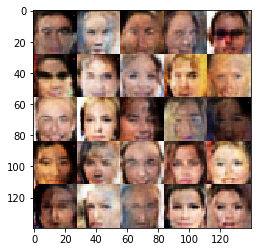

Epoch 1/1... Discriminator Loss: 0.5416... Generator Loss: 1.9759
Epoch 1/1... Discriminator Loss: 0.3936... Generator Loss: 3.4763
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.8216
Epoch 1/1... Discriminator Loss: 0.3760... Generator Loss: 4.6454
Epoch 1/1... Discriminator Loss: 0.4962... Generator Loss: 2.3481
Epoch 1/1... Discriminator Loss: 0.3640... Generator Loss: 5.8669
Epoch 1/1... Discriminator Loss: 0.4169... Generator Loss: 4.1913
Epoch 1/1... Discriminator Loss: 0.4145... Generator Loss: 2.9251
Epoch 1/1... Discriminator Loss: 0.3976... Generator Loss: 4.6041
Epoch 1/1... Discriminator Loss: 0.4267... Generator Loss: 2.7444


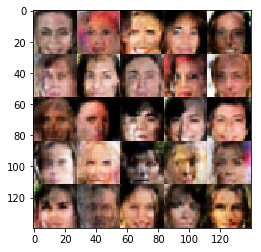

Epoch 1/1... Discriminator Loss: 0.3720... Generator Loss: 3.7087
Epoch 1/1... Discriminator Loss: 0.3903... Generator Loss: 3.3053
Epoch 1/1... Discriminator Loss: 0.7256... Generator Loss: 1.6983
Epoch 1/1... Discriminator Loss: 0.3867... Generator Loss: 3.6334
Epoch 1/1... Discriminator Loss: 0.3509... Generator Loss: 4.9214
Epoch 1/1... Discriminator Loss: 0.3788... Generator Loss: 3.4517
Epoch 1/1... Discriminator Loss: 0.4876... Generator Loss: 2.2999
Epoch 1/1... Discriminator Loss: 0.7632... Generator Loss: 1.2744
Epoch 1/1... Discriminator Loss: 0.4535... Generator Loss: 2.5484
Epoch 1/1... Discriminator Loss: 0.4016... Generator Loss: 3.2279


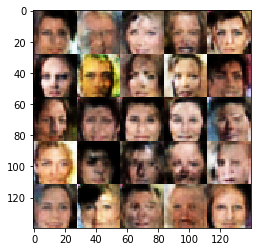

Epoch 1/1... Discriminator Loss: 0.3769... Generator Loss: 4.2242
Epoch 1/1... Discriminator Loss: 0.5524... Generator Loss: 1.8373
Epoch 1/1... Discriminator Loss: 0.3609... Generator Loss: 4.6890
Epoch 1/1... Discriminator Loss: 0.3620... Generator Loss: 3.8553
Epoch 1/1... Discriminator Loss: 0.4589... Generator Loss: 2.7645
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 3.4433
Epoch 1/1... Discriminator Loss: 0.3996... Generator Loss: 3.8261
Epoch 1/1... Discriminator Loss: 0.3973... Generator Loss: 4.4998
Epoch 1/1... Discriminator Loss: 1.9815... Generator Loss: 0.3077
Epoch 1/1... Discriminator Loss: 2.0640... Generator Loss: 0.3775


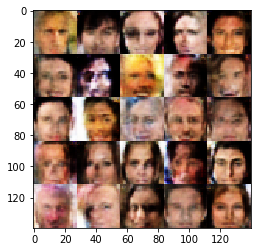

Epoch 1/1... Discriminator Loss: 0.4472... Generator Loss: 2.7560
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 4.2687
Epoch 1/1... Discriminator Loss: 0.5198... Generator Loss: 2.2955
Epoch 1/1... Discriminator Loss: 0.3604... Generator Loss: 4.4906
Epoch 1/1... Discriminator Loss: 1.0189... Generator Loss: 1.1811
Epoch 1/1... Discriminator Loss: 0.8429... Generator Loss: 1.1399
Epoch 1/1... Discriminator Loss: 0.3665... Generator Loss: 4.1681
Epoch 1/1... Discriminator Loss: 0.6336... Generator Loss: 1.5793
Epoch 1/1... Discriminator Loss: 0.4144... Generator Loss: 3.1137
Epoch 1/1... Discriminator Loss: 0.4510... Generator Loss: 2.5219


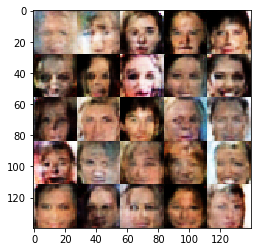

Epoch 1/1... Discriminator Loss: 0.3808... Generator Loss: 3.2781
Epoch 1/1... Discriminator Loss: 1.2732... Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 0.8666... Generator Loss: 3.8219
Epoch 1/1... Discriminator Loss: 0.3780... Generator Loss: 5.0725
Epoch 1/1... Discriminator Loss: 0.4129... Generator Loss: 2.8350
Epoch 1/1... Discriminator Loss: 0.3623... Generator Loss: 4.6719
Epoch 1/1... Discriminator Loss: 0.3484... Generator Loss: 5.7321
Epoch 1/1... Discriminator Loss: 0.3429... Generator Loss: 5.4798
Epoch 1/1... Discriminator Loss: 2.0415... Generator Loss: 0.4104
Epoch 1/1... Discriminator Loss: 0.3638... Generator Loss: 4.4774


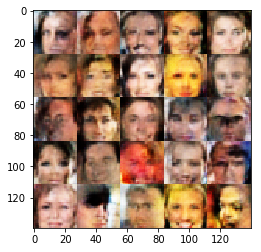

Epoch 1/1... Discriminator Loss: 0.4421... Generator Loss: 3.5705
Epoch 1/1... Discriminator Loss: 0.4235... Generator Loss: 2.8173
Epoch 1/1... Discriminator Loss: 0.3546... Generator Loss: 4.2992
Epoch 1/1... Discriminator Loss: 0.5308... Generator Loss: 1.9256
Epoch 1/1... Discriminator Loss: 0.9639... Generator Loss: 1.0039
Epoch 1/1... Discriminator Loss: 0.5867... Generator Loss: 2.0655
Epoch 1/1... Discriminator Loss: 0.3636... Generator Loss: 5.3141
Epoch 1/1... Discriminator Loss: 0.3971... Generator Loss: 3.4604
Epoch 1/1... Discriminator Loss: 0.4420... Generator Loss: 2.7018
Epoch 1/1... Discriminator Loss: 0.5647... Generator Loss: 2.4873


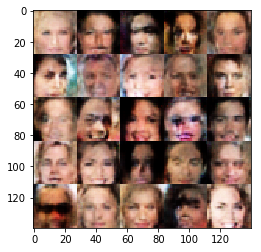

Epoch 1/1... Discriminator Loss: 0.4363... Generator Loss: 2.7204
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 1.6115
Epoch 1/1... Discriminator Loss: 0.4009... Generator Loss: 3.7625
Epoch 1/1... Discriminator Loss: 0.3515... Generator Loss: 6.0728
Epoch 1/1... Discriminator Loss: 0.5278... Generator Loss: 2.0998
Epoch 1/1... Discriminator Loss: 0.3577... Generator Loss: 4.7532
Epoch 1/1... Discriminator Loss: 0.3623... Generator Loss: 5.3437
Epoch 1/1... Discriminator Loss: 0.4716... Generator Loss: 2.8070


KeyboardInterrupt: 

In [23]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.